## 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [52]:
#from reading stockdata from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [53]:
# For time stamps
from datetime import datetime
#The tech stocks we'll use for this analysis
tech_list=['AAPL','GOOG','MSFT','AMZN']
#Set up End and Start times for data grab
tech_list=['AAPL','GOOG','MSFT','AMZN']
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)
for stock in tech_list:
    globals()[stock]=yf.download(stock,start,end)

company_list=[AAPL,GOOG,MSFT,AMZN]
company_name=["APPLE","GOOGLE","MICROSOFT","AMAZON"]

for company,com_name in zip(company_list,company_name):
    company["company_name"]=com_name
df=pd.concat(company_list,axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-22,100.449997,102.099998,98.610001,98.699997,98.699997,57475400,AMAZON
2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300,AMAZON
2023-03-24,98.070000,98.300003,96.400002,98.129997,98.129997,56095400,AMAZON
2023-03-27,99.070000,99.339996,97.080002,98.040001,98.040001,46721300,AMAZON
2023-03-28,98.110001,98.440002,96.290001,97.239998,97.239998,38720100,AMAZON
2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300,AMAZON
2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400,AMAZON
2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300,AMAZON
2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700,AMAZON


In [54]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,105.085451,106.665799,103.701538,105.166618,105.166618,2.869891e+07
std,11.600865,11.666529,11.359624,11.462982,11.462982,1.122885e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.759998,97.349998,94.470001,95.840000,95.840000,2.185200e+07
50%,102.879997,104.220001,101.860001,103.629997,103.629997,2.603390e+07
75%,113.983250,116.341000,112.562000,114.574253,114.574253,3.235145e+07
max,143.399506,143.589996,140.943497,141.063004,141.063004,9.779860e+07


In [55]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-04-05 to 2023-04-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


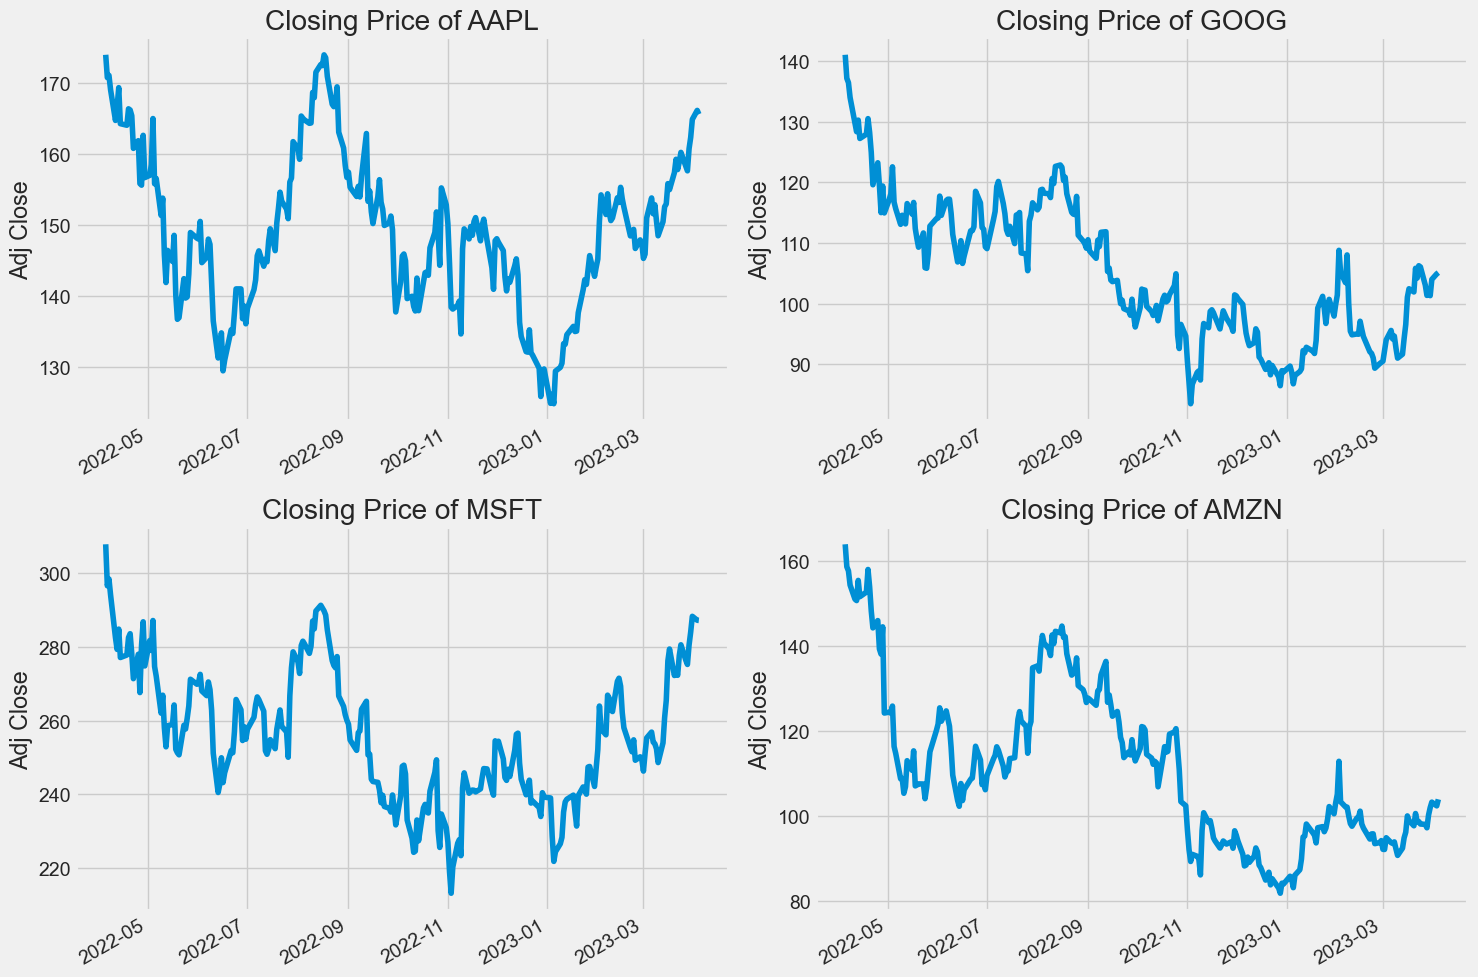

In [56]:
#historical view of closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

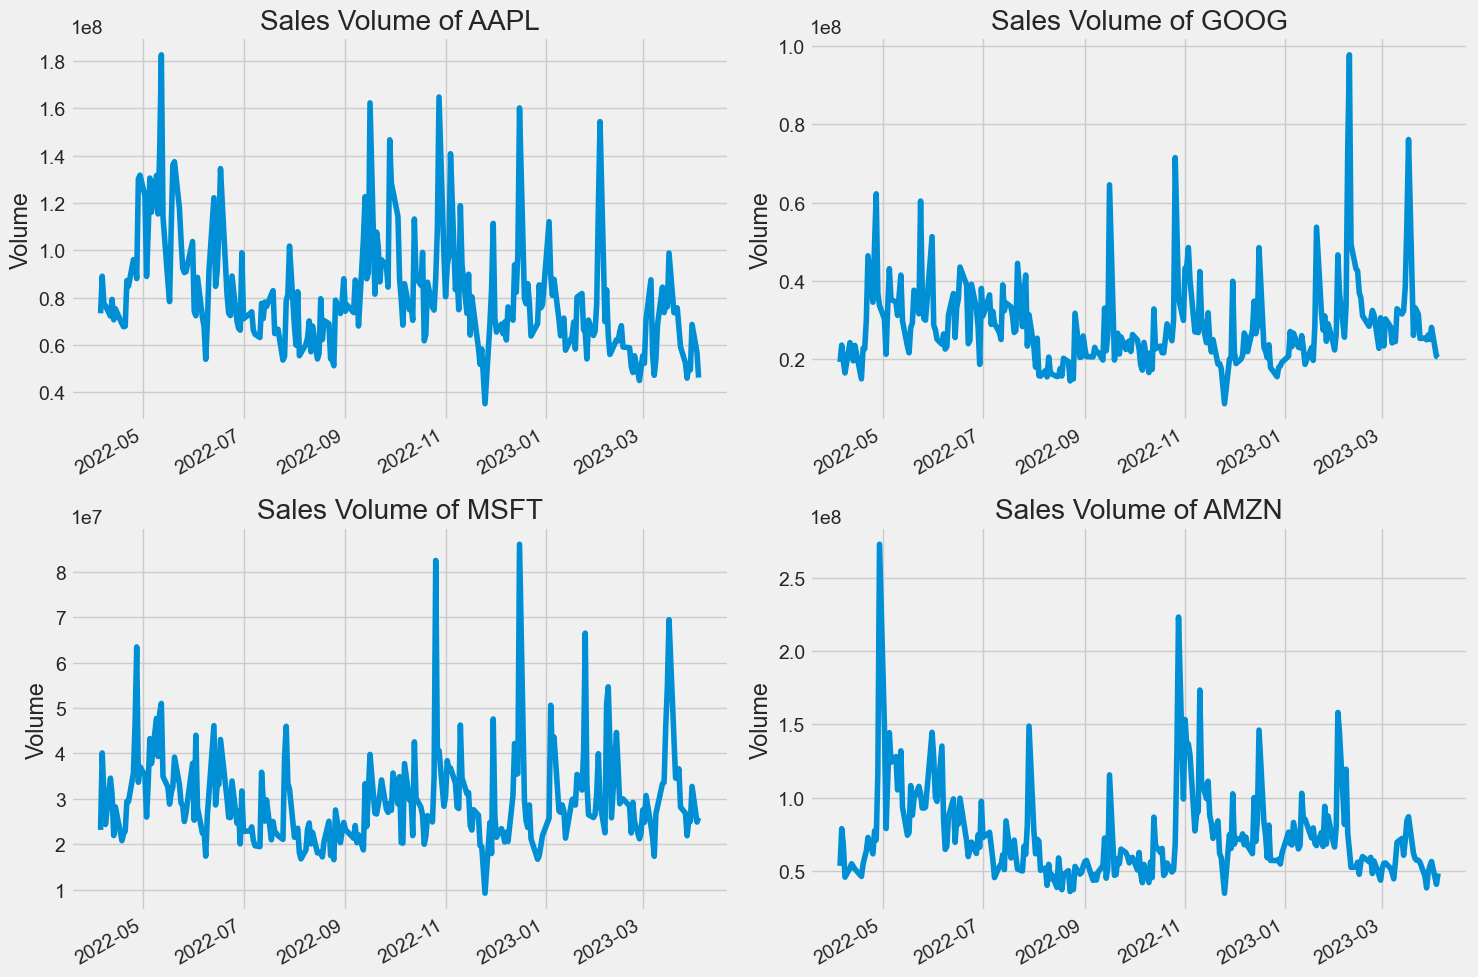

In [57]:
#plot the total volume of stock being traded each day
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i ,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume of {tech_list[i-1]}")

plt.tight_layout()

## 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

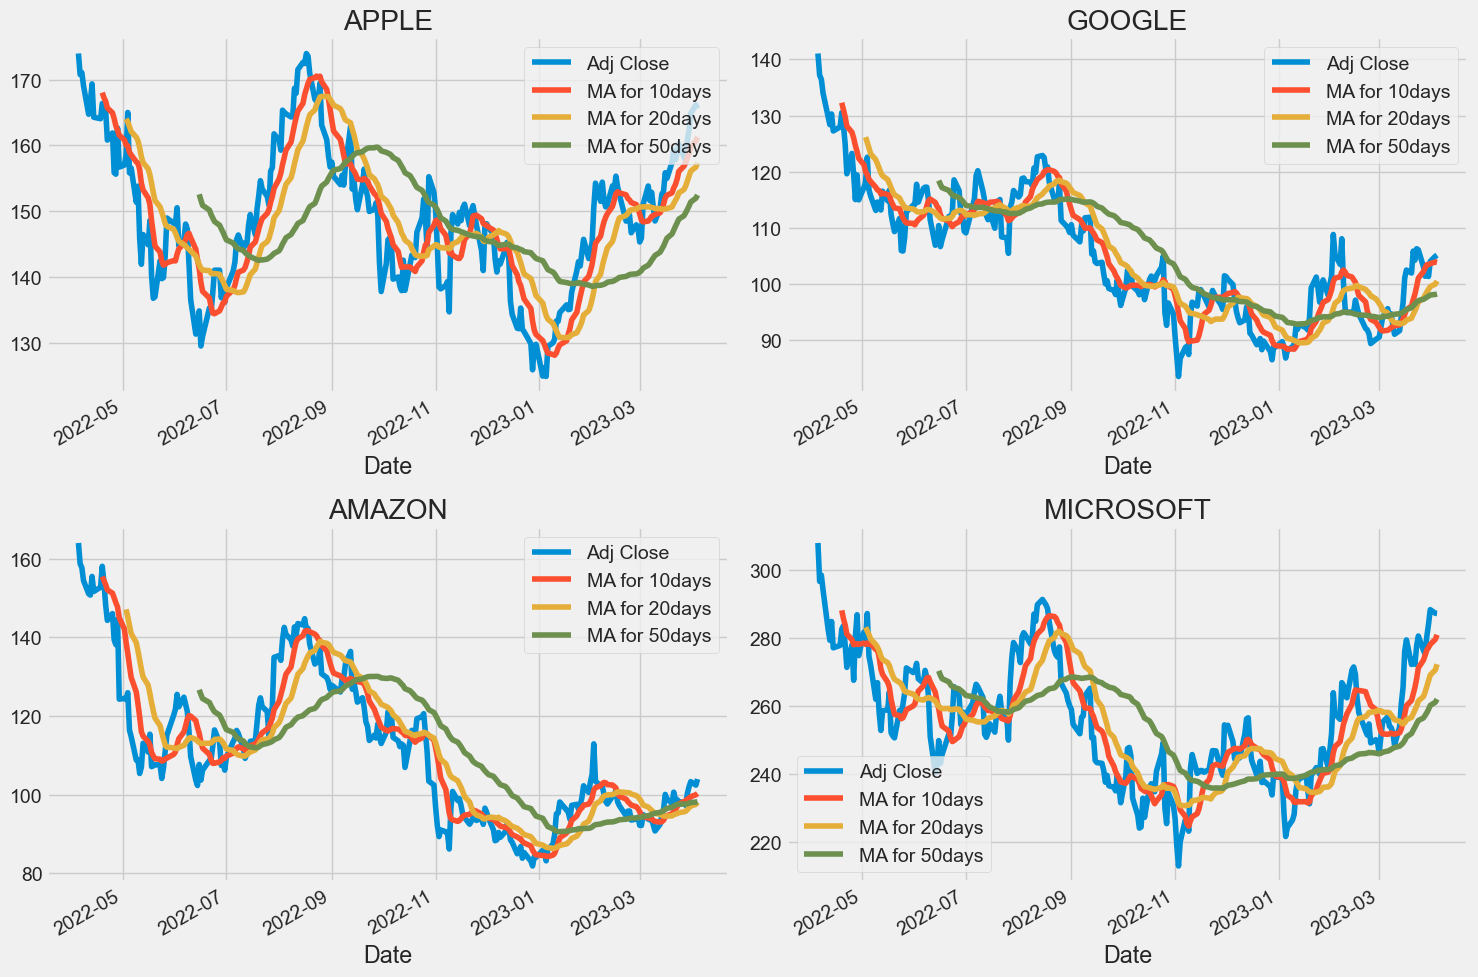

In [58]:
ma_day=[10,20,50]
for ma in ma_day:
    for company in company_list:
        column_name=f"MA for {ma}days"
        company[column_name]=company['Adj Close'].rolling(ma).mean()

fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close','MA for 10days','MA for 20days','MA for 50days']].plot(ax=axes[0,0]) # type: ignore
axes[0,0].set_title('APPLE') # type: ignore

GOOG[['Adj Close','MA for 10days','MA for 20days','MA for 50days']].plot(ax=axes[0,1]) # type: ignore
axes[0,1].set_title('GOOGLE') # type: ignore

AMZN[['Adj Close','MA for 10days','MA for 20days','MA for 50days']].plot(ax=axes[1,0]) # type: ignore
axes[1,0].set_title('AMAZON') # type: ignore

MSFT[['Adj Close','MA for 10days','MA for 20days','MA for 50days']].plot(ax=axes[1,1]) # type: ignore
axes[1,1].set_title('MICROSOFT') # type: ignore

plt.tight_layout()

## 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock

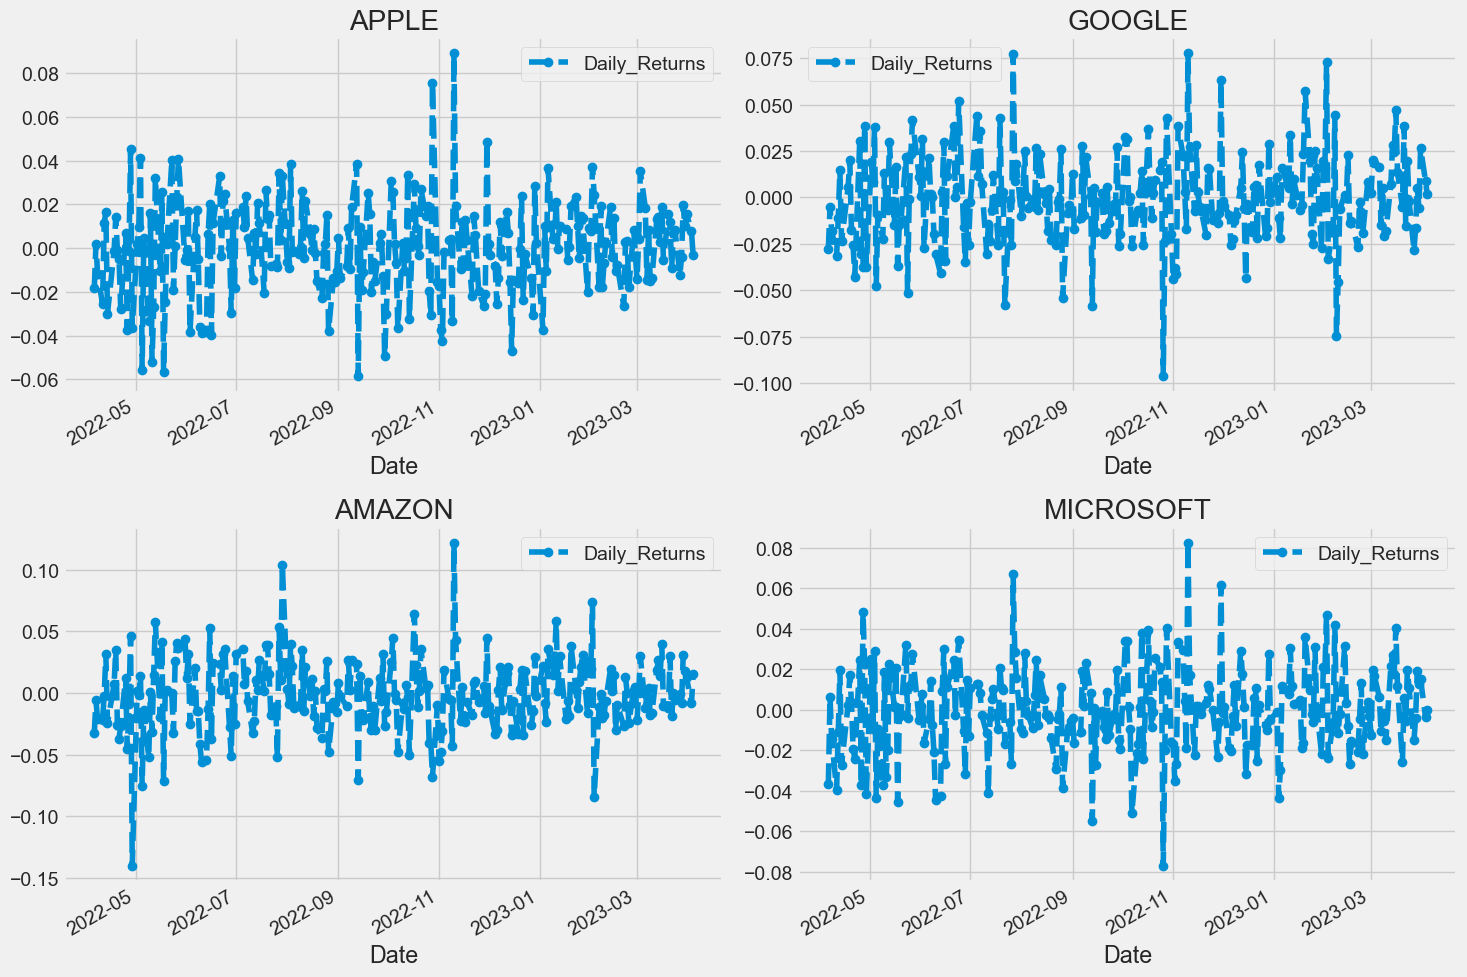

In [59]:
# We'll use pct_change to find the percent change for each day

for company in company_list:
    company['Daily_Returns']=company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily_Returns'].plot(ax=axes[0,0],legend=True,linestyle='--',marker='o')
axes[0,0].set_title('APPLE')
GOOG['Daily_Returns'].plot(ax=axes[0,1],legend=True,linestyle='--',marker='o')
axes[0,1].set_title('GOOGLE')
AMZN['Daily_Returns'].plot(ax=axes[1,0],legend=True,linestyle='--',marker='o')
axes[1,0].set_title('AMAZON')
MSFT['Daily_Returns'].plot(ax=axes[1,1],legend=True,linestyle='--',marker='o')
axes[1,1].set_title('MICROSOFT')

plt.tight_layout()


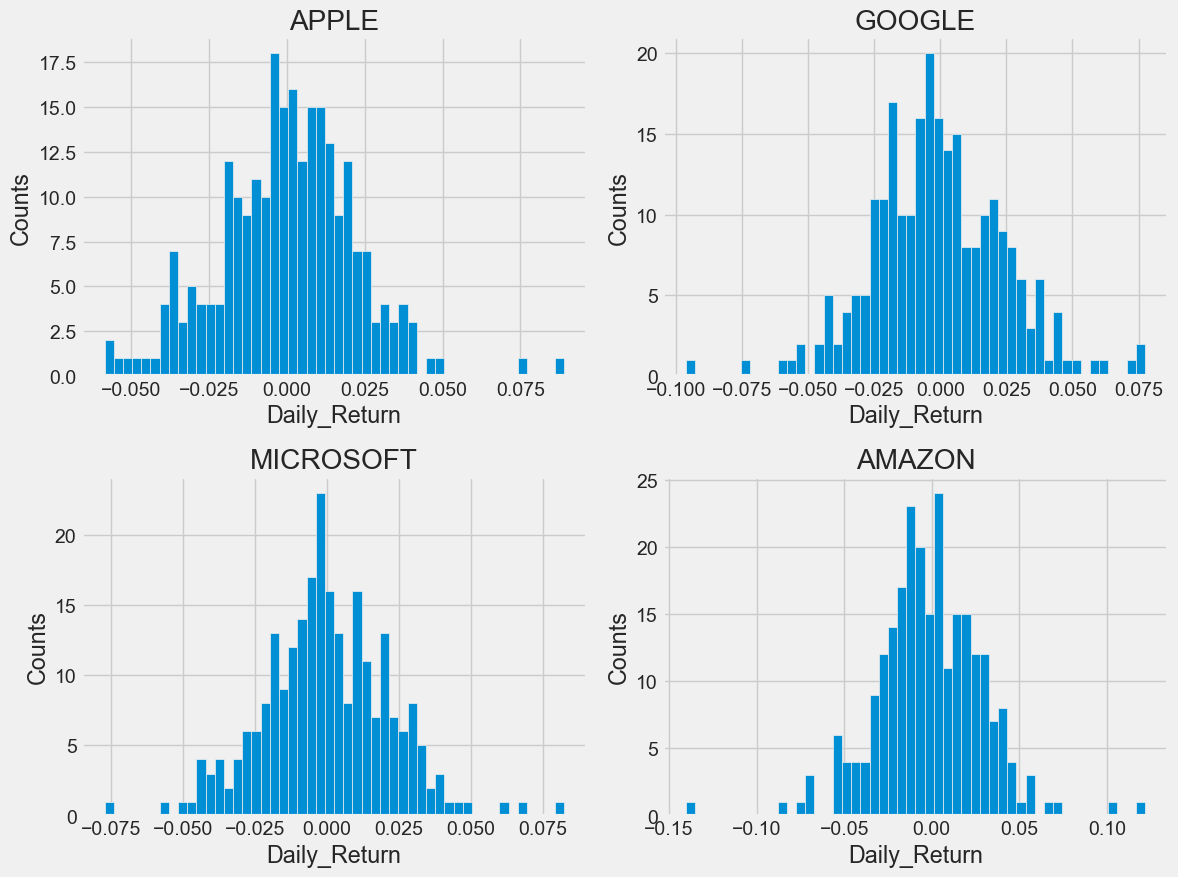

In [60]:
plt.figure(figsize=(12,9))

for i ,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily_Returns'].hist(bins=50)
    plt.xlabel('Daily_Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')

plt.tight_layout()

## 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes

In [61]:
# Grab all the closing prices for the tech stock list into one DataFram
closing_df=pdr.get_data_yahoo(tech_list,start=start,end=end)['Adj Close']
#Make a new tech returns DataFrame
tech_rets=closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-05,NaN,NaN,NaN,NaN
2022-04-06,-0.018451,-0.032300,-0.027555,-0.036606
2022-04-07,0.001804,-0.006119,-0.005183,0.006244
2022-04-08,-0.011909,-0.021067,-0.017986,-0.014600
2022-04-11,-0.025516,-0.021614,-0.031445,-0.039432


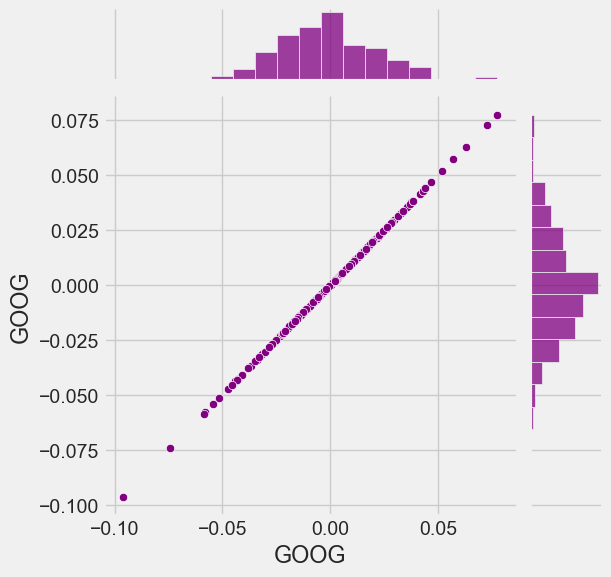

In [62]:
# Comparing Google to itself should show a perfectly linear relationship

sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,color='purple',kind='scatter')

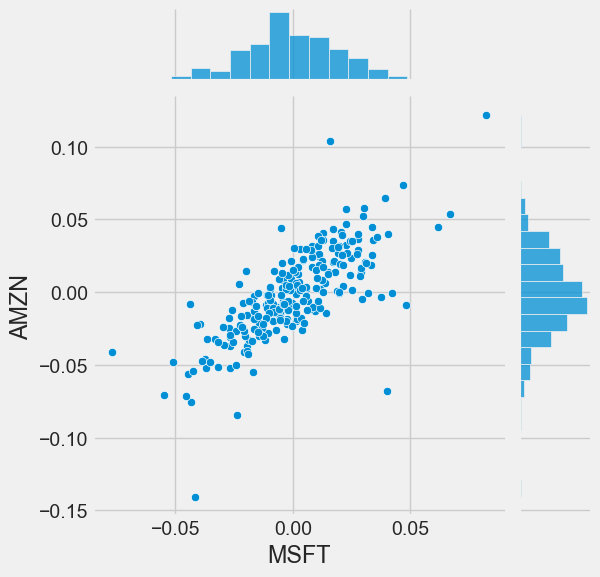

In [63]:
# We'll use joinplot to compare the daily returns of Google and Microsoft

sns.jointplot(x='MSFT',y='AMZN',data=tech_rets,kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

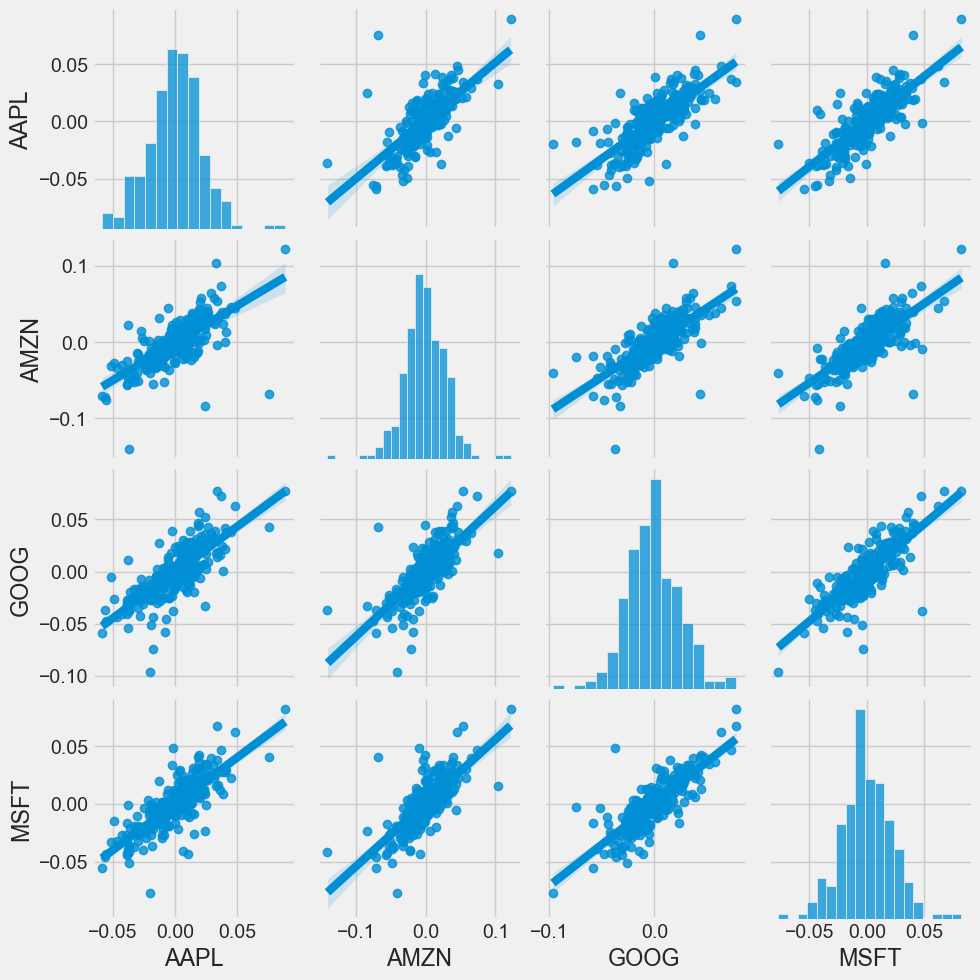

In [64]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(data=tech_rets,kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

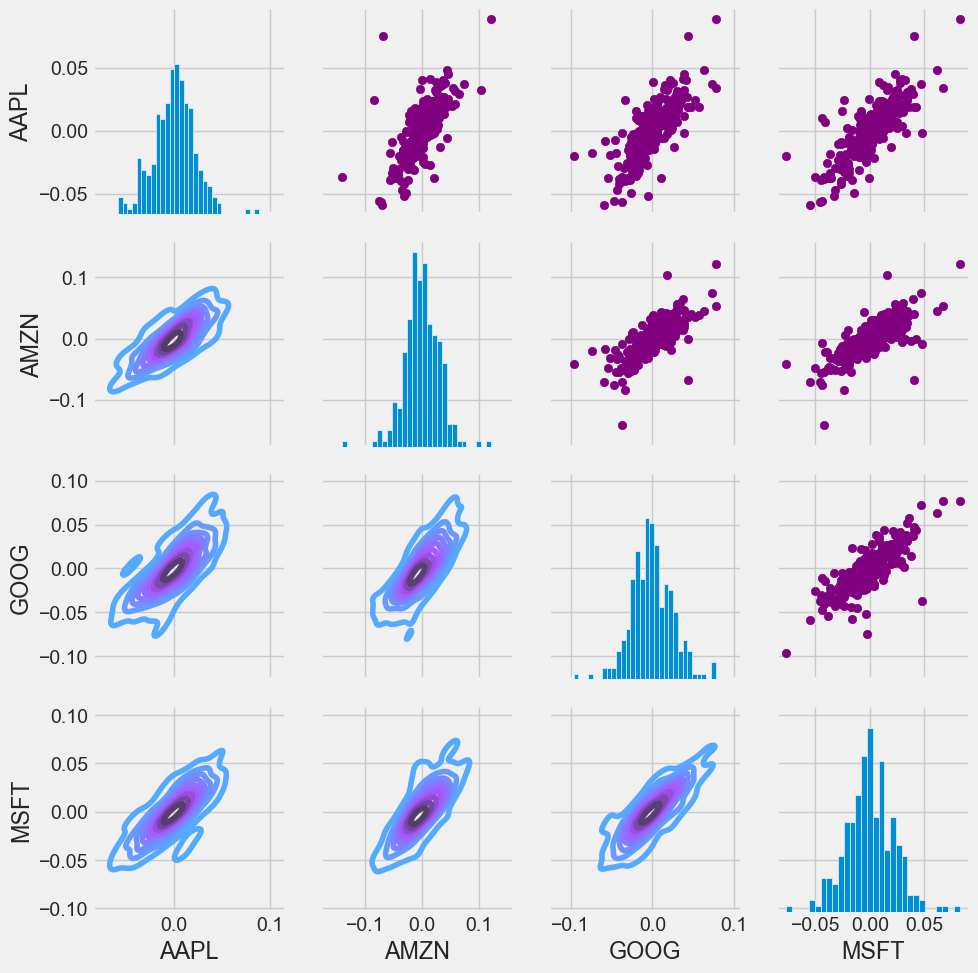

In [65]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

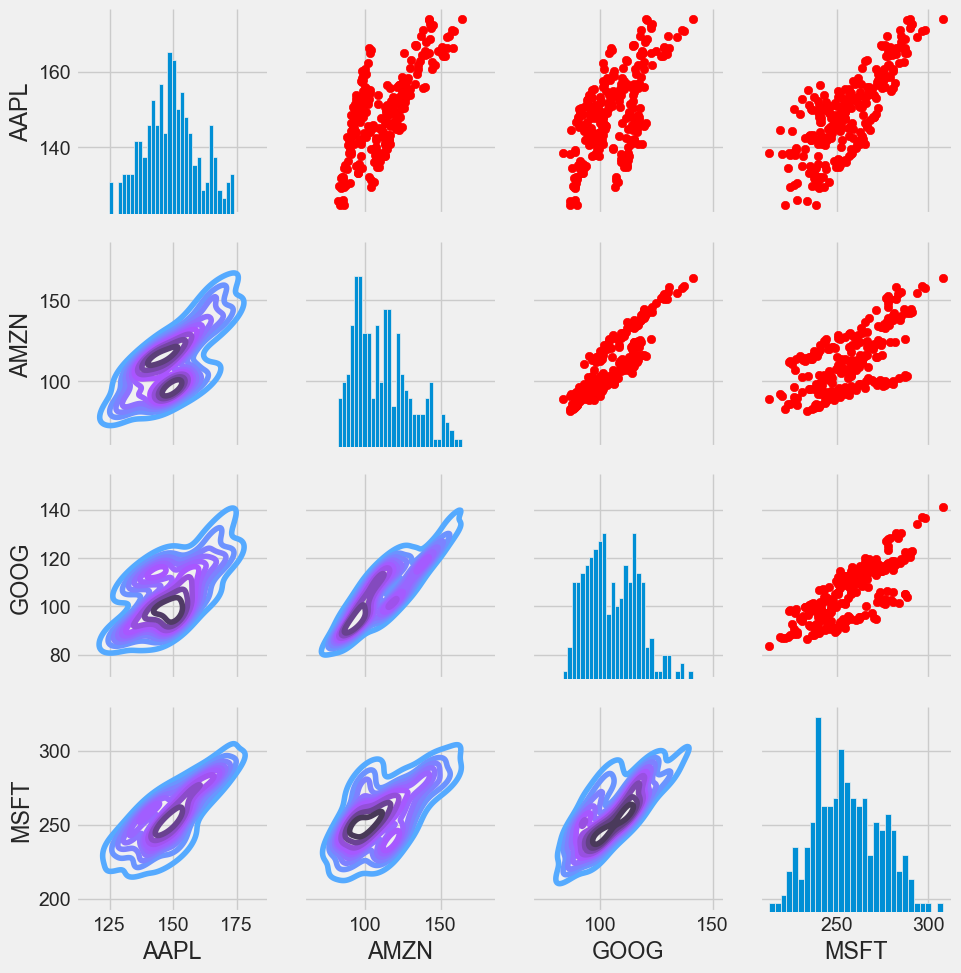

In [66]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='red')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

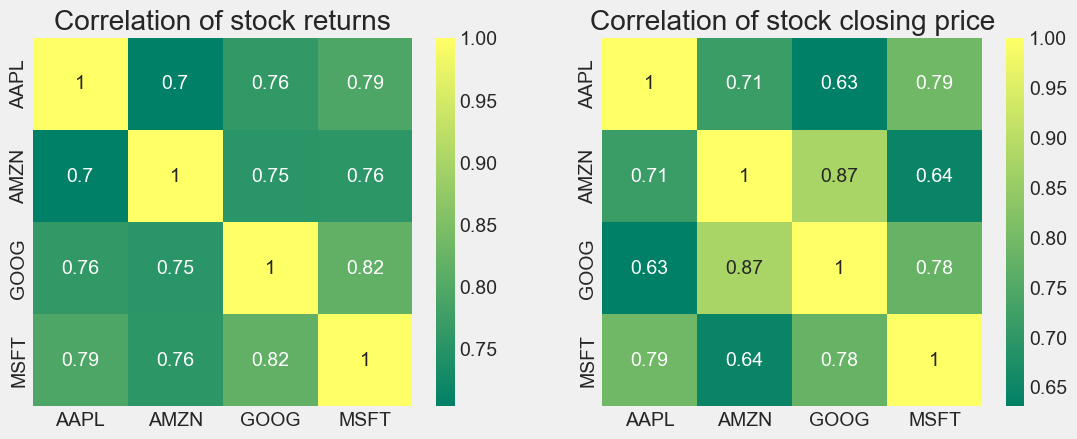

In [67]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(),annot=True,cmap='summer')
plt.title('Correlation of stock returns')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(),annot=True,cmap='summer')
plt.title('Correlation of stock closing price')

## 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

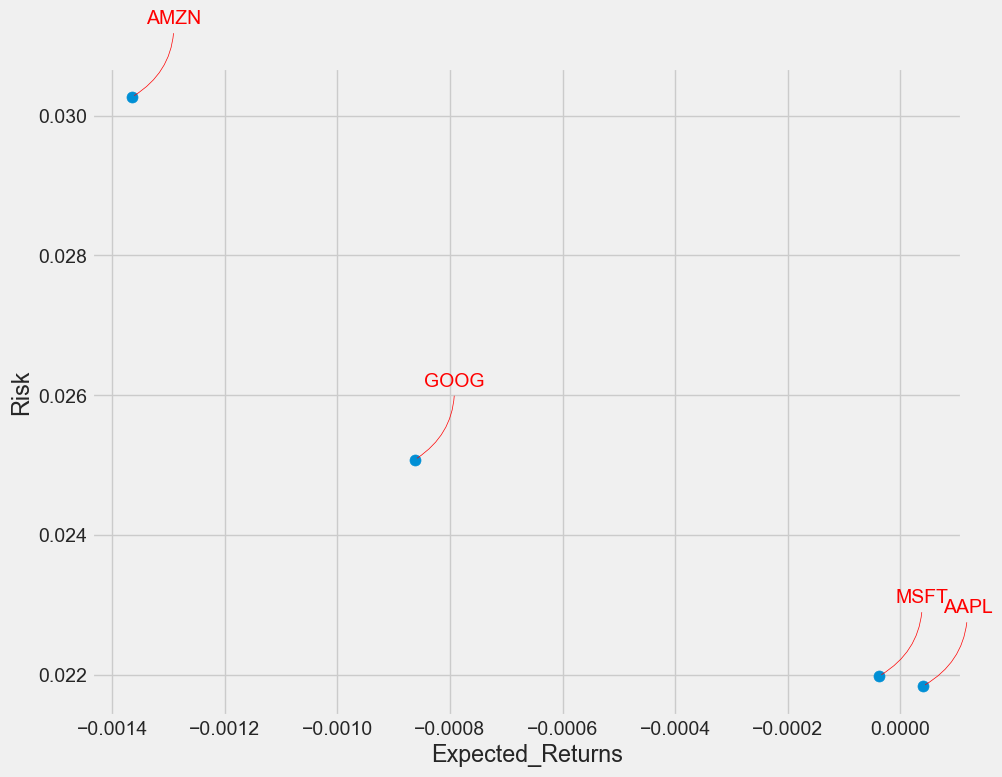

In [68]:
rets=tech_rets.dropna()

area=np.pi*20

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected_Returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(50,50),textcoords='offset points',ha='right',va='bottom',
                 arrowprops=dict(arrowstyle='-',color='red',connectionstyle='arc3,rad=-0.3'),color='red')

## 6. Predicting the closing price stock price of APPLE inc:


In [69]:
# get the stock Quote
df=pdr.get_data_yahoo('AAPL',start='2012-01-01',end=datetime.now())
#show tech data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500196,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567371,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706898,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839730,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819364,394024400
...,...,...,...,...,...,...
2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700
2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700


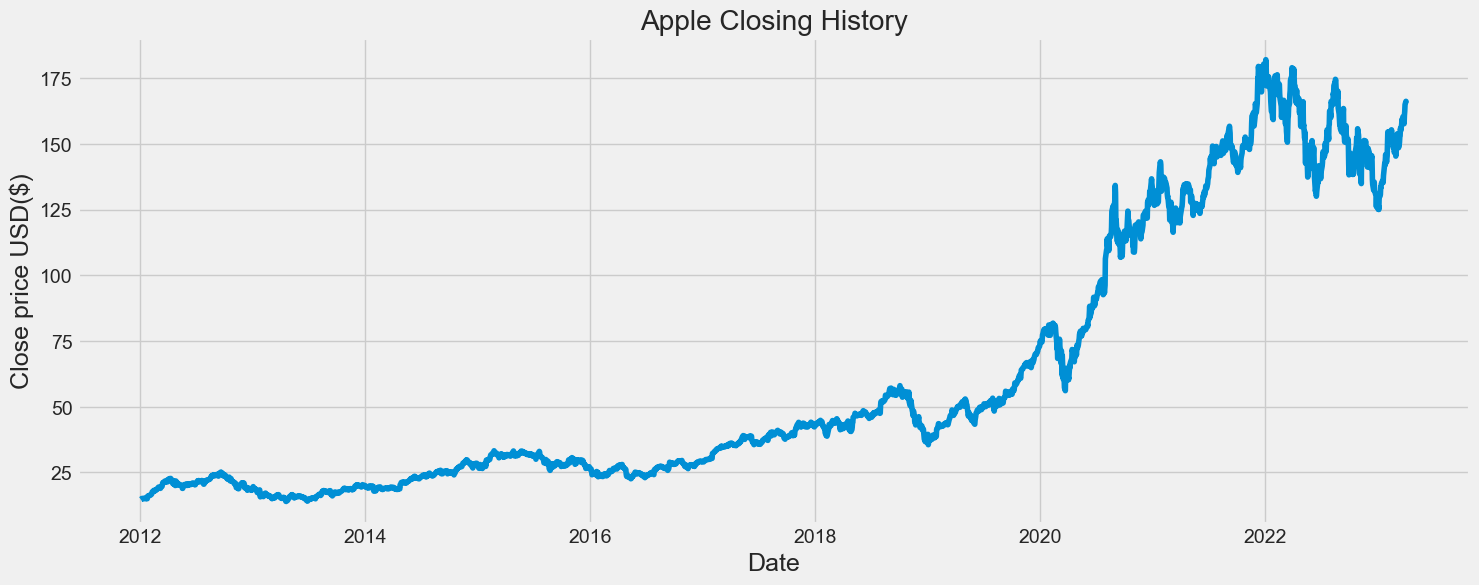

In [70]:
plt.figure(figsize=(16,6))
plt.title('Apple Closing History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.show()

In [71]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2691

In [72]:
#scale the data
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.89819263],
       [0.90574937],
       [0.90253632]])

In [73]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [74]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2631/2631 [==============================] - 42s 15ms/step - loss: 0.0012


In [75]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 12ms/step


10.604161328470456

C:\Users\sidde\AppData\Local\Temp\ipykernel_11512\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


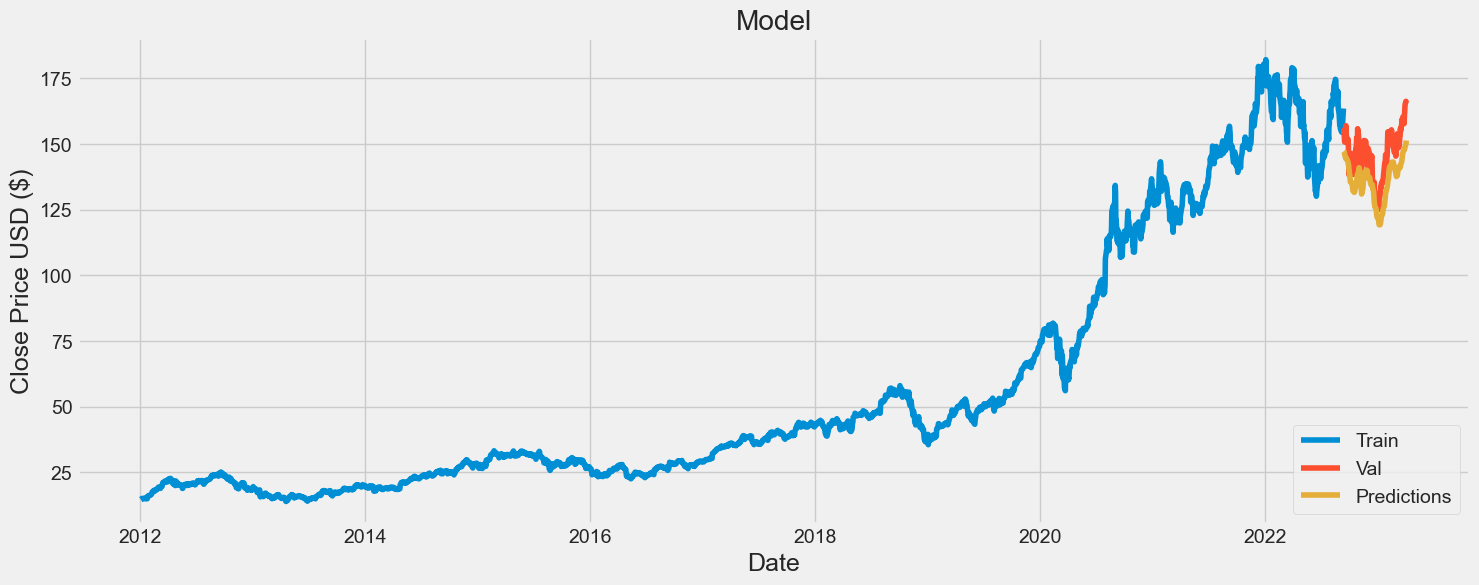

In [76]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [77]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-09-13,153.839996,147.208603
2022-09-14,155.309998,147.064926
2022-09-15,152.369995,146.759888
2022-09-16,150.699997,145.937073
2022-09-19,154.479996,144.789963
...,...,...
2023-03-29,160.770004,147.830704
2023-03-30,162.360001,148.207550
2023-03-31,164.899994,148.891220
